<a href="https://colab.research.google.com/github/rigonzal/ML-2019-1/blob/master/Tarea3/Tarea3_Pregunta3_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INF-393: Máquinas de Aprendizaje

## Tarea 3 - Pregunta 3

13-09-2019



*   Rodrigo González Smith           -- 201303026-2
*   Ignacio Valenzuela Albornoz   -- 201473055-1

## Clasificación en texto

Uno de los enfoques interesantes que posee el machine learning son los problemas de procesamiento de lenguaje natural. En esta ocasión ocuparemos un dataset de imdb, donde se tienen reviews de películas y que son categorizados como positivos o negativos,

In [0]:
import time
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from keras.datasets import imdb
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from sklearn.linear_model import LinearRegression
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

%matplotlib inline

## a) Carga de datos y pre-procesamientos

Como sabemos los modelos utilizan como entradas datos que representan números, ya que aplican diversas funciones y procesos matemáticos, por lo que debemos buscar una manera de transformar o mapear los textos a un número, para que así los modelos puedan consumirlos y realizar el aprendizaje.

Para eso vectorizaremos las secuencias de palabras. Primero extraemos los datos de la librería de imdb. Tenemos dos parámetros importantes en la extracción:


*   num_words: Indica la cantidad de palabras que incluiremos en nuestro vocabulario. En imdb, tenemos las palabras más frecuentes ordenadas de mayor a menor. Por lo tanto, este parámetro tomara las primeras *num_words* de esta lista.
*   skip_top: Es un valor entero, que indica que las *skip_top* palabras más frecuentes son eliminadas. Esto principalmente porque las palabras más frecuentes son conectores o artículos como "y", "además", "con", "él", los cuales no dan mucha información y están principalmente para una buena redacción.

Finalmente, crearemos una función que vectoriza estas secuencias. Tendrá como parámetros sequences, que serán las palabras, y dimension, que nos indicarán la cantidad de dimensión (o palabras) que contendrá cada secuencia.

In [0]:
num_words = 500
(x_tr, y_tr), (x_val, y_val) = imdb.load_data(num_words=num_words, skip_top=5)

def vectorize_sequences(sequences, dimension = 500):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_tr = vectorize_sequences(x_tr, 500)
x_val = vectorize_sequences(x_val, 500)

17465344/17464789 [==============================] - 1s 0us/step


## b) Perceptrón

Un perceptrón es la unidad más básica de una red neuronal. La utilizaremos para entrenar este modelo y analizar su desempeño.

In [0]:
per = Sequential()
per.add(Dense(1,activation='sigmoid'))
per.compile('sgd',loss='binary_crossentropy',metrics=['accuracy'])
history = per.fit(x_tr,y_tr, epochs=15, validation_data=(x_val,y_val))
per.summary()






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 2s 82us/step - loss: 0.6189 - acc: 0.6620 - val_loss: 0.5494 - val_acc: 0.7514
Epoch 2/15
25000/25000 [==============================] - 1s 60us/step - loss: 0.5130 - acc: 0.7770 - val_loss: 0.4899 - val_acc: 0.7902
Epoch 3/15
25000/25000 [==============================] - 2s 60us/step - loss: 0.4699 - acc: 0.7992 - val_loss: 0.4607 - val_acc: 0.8008
Epoch 4/15
25000/25000 [==============================] - 2s 60us/step - loss: 0.4458 - acc: 0.8123 - val_loss: 0.4442 - val_acc: 0.8064
Epoch 5/15
25000/25000 [==============================] - 2s 61us/step - loss: 0.4303 - acc: 0.8187 - val_loss: 0.4318 - val_acc: 0.8118
Epoch 6/15
25000/25000 [==============================] - 1s 60us/step - loss: 0.4192 - acc: 0.8229 - val_loss: 0.4216 - val_acc: 0.8164
Epoch 7/15
25000/25000 [====

Como podemos apreciar el modelo se compone de 501 parámetros. 500 de estos son los que corresponden a las dimensiones del input, y la dimensión restante es el bias que generalmente acompaña a cada capa de una red neuronal. Ahora veremos gráficamente el desempeño de este modelo en los conjuntos

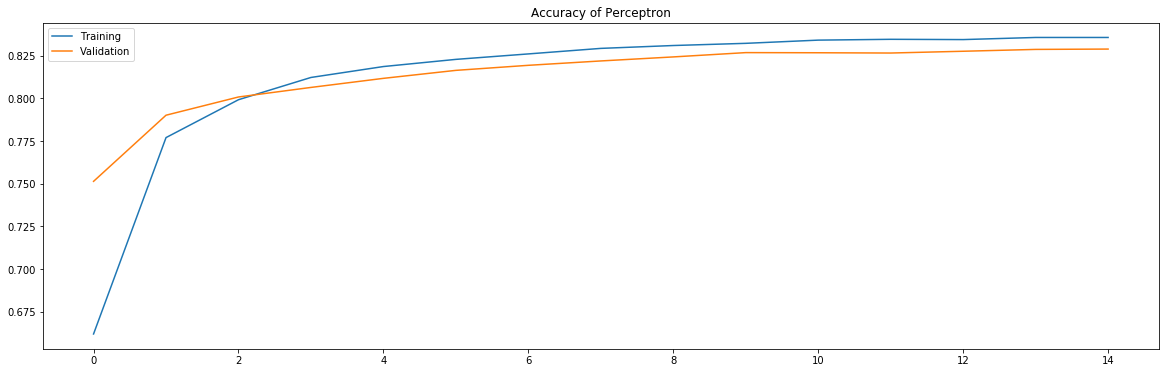

In [0]:
plt.figure(figsize=(20,6))
plt.title("Accuracy of Perceptron")
plt.plot(range(0, 15), history.history['acc'])
plt.plot(range(0, 15), history.history['val_acc'])
plt.legend(["Training", "Validation"])

Vemos que el accuracy van aumentando para ambos, pero mientras avanzan las epoch, para ambos conjuntos no parece mejorar su desempeño, por lo que por menos epochs podemos obtener un buen resultado.

## c) Red con una capa oculta

Ahora ocuparemos una red con una capa oculta. A esta capa oculta le asignaremos 64 neuronas y una función de activación ReLU. ReLU viene de Rectified Linear Unit, y es una función constante y = x, pero que cuando x es negativo mantiene un valor de y constante en 0. Por lo tanto como salida obtendremos solo resultados positivos o, en el peor caso, 0. Entrenaremos ahora la red y comprobaremos su desempeño.

In [0]:
model = Sequential()
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile('sgd',loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(x_tr,y_tr, epochs=15, validation_data=(x_val,y_val))
model.summary()

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 2s 79us/step - loss: 0.5928 - acc: 0.6946 - val_loss: 0.5126 - val_acc: 0.7637
Epoch 2/15
25000/25000 [==============================] - 2s 73us/step - loss: 0.4649 - acc: 0.7930 - val_loss: 0.4384 - val_acc: 0.8002
Epoch 3/15
25000/25000 [==============================] - 2s 71us/step - loss: 0.4154 - acc: 0.8156 - val_loss: 0.4134 - val_acc: 0.8137
Epoch 4/15
25000/25000 [==============================] - 2s 70us/step - loss: 0.3937 - acc: 0.8270 - val_loss: 0.4009 - val_acc: 0.8218
Epoch 5/15
25000/25000 [==============================] - 2s 71us/step - loss: 0.3816 - acc: 0.8328 - val_loss: 0.3939 - val_acc: 0.8253
Epoch 6/15
25000/25000 [==============================] - 2s 72us/step - loss: 0.3749 - acc: 0.8362 - val_loss: 0.3954 - val_acc: 0.8264
Epoch 7/15
25000/25000 [==============================] - 2s 73us/step - loss: 0.3709 - acc: 0.8367 - val_loss: 0.3876 - val_acc

Vemos que posee una gran cantidad de parámetros, principalmente porque por cada neurona recibiremos datos de dimensión 500, por lo que nos dará un gran resultado. En la capa de salida, obtenemos un parámetro por cada neurona de la capa anterior además del bias propia de esa capa. Analizando el accuracy en este caso, obtenemos lo siguiente:

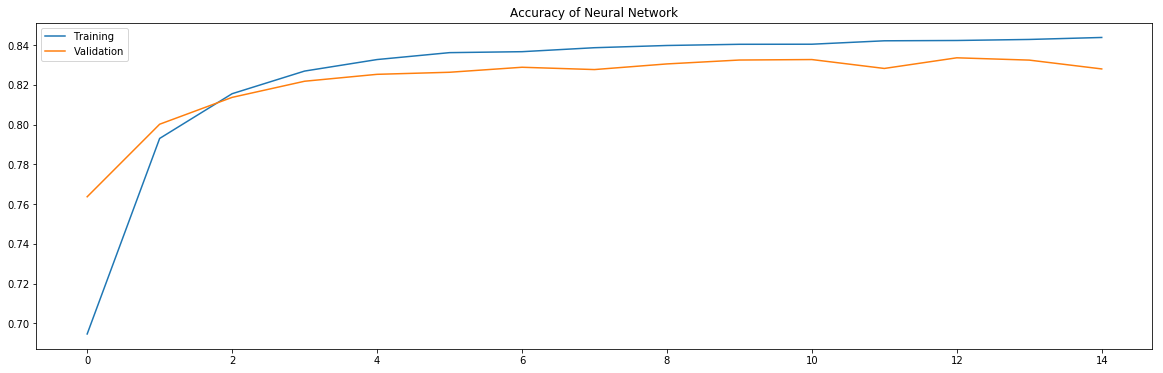

In [0]:
plt.figure(figsize=(20,6))
plt.title("Accuracy of Neural Network")
plt.plot(range(0, 15), history.history['acc'])
plt.plot(range(0, 15), history.history['val_acc'])
plt.legend(["Training", "Validation"])

Se puede apreciar en la gráfica un pequeño sobreajuste, ya que el accuracy de validación se mantiene mientras la de entrenamiento sigue aumentando. En la comparación con el perceptrón anterior, aún así, no presenta grandes diferencias.

Ahora entrenaremos la misma estructura de red neuronal, pero cambiaremos la función de activación de ReLU a una tanh.

In [0]:
model2 = Sequential()
model2.add(Dense(64, activation='tanh'))
model2.add(Dense(1,activation='sigmoid'))
model2.compile('sgd',loss='binary_crossentropy',metrics=['accuracy'])
history2 = model2.fit(x_tr,y_tr, epochs=15, validation_data=(x_val,y_val))
model2.summary()

Train on 25000 samples, validate on 25000 samples
Epoch 1/15
25000/25000 [==============================] - 2s 79us/step - loss: 0.5812 - acc: 0.7011 - val_loss: 0.4917 - val_acc: 0.7771
Epoch 2/15
25000/25000 [==============================] - 2s 72us/step - loss: 0.4518 - acc: 0.7992 - val_loss: 0.4294 - val_acc: 0.8075
Epoch 3/15
25000/25000 [==============================] - 2s 73us/step - loss: 0.4091 - acc: 0.8202 - val_loss: 0.4037 - val_acc: 0.8198
Epoch 4/15
25000/25000 [==============================] - 2s 72us/step - loss: 0.3897 - acc: 0.8272 - val_loss: 0.3946 - val_acc: 0.8248
Epoch 5/15
25000/25000 [==============================] - 2s 73us/step - loss: 0.3798 - acc: 0.8334 - val_loss: 0.3860 - val_acc: 0.8303
Epoch 6/15
25000/25000 [==============================] - 2s 73us/step - loss: 0.3734 - acc: 0.8373 - val_loss: 0.3823 - val_acc: 0.8315
Epoch 7/15
25000/25000 [==============================] - 2s 74us/step - loss: 0.3697 - acc: 0.8372 - val_loss: 0.3813 - val_acc

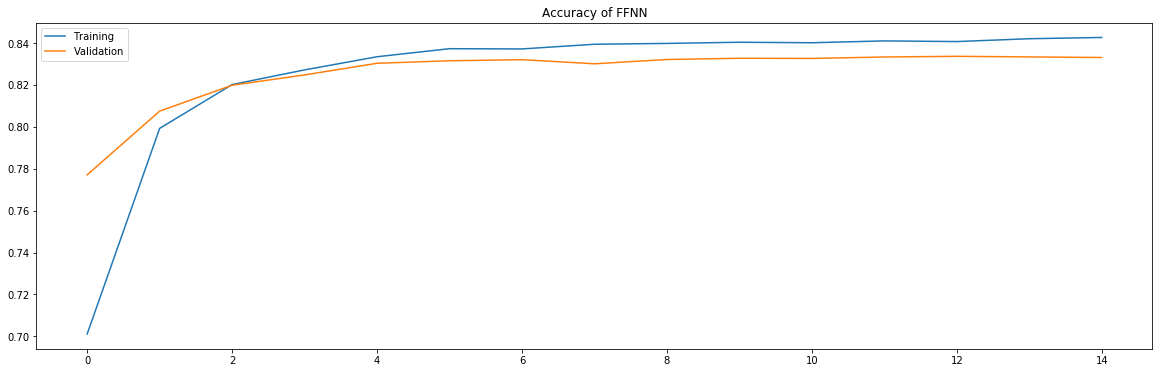

In [0]:
plt.figure(figsize=(20,6))
plt.title("Accuracy of FFNN")
plt.plot(range(0, 15), history2.history['acc'])
plt.plot(range(0, 15), history2.history['val_acc'])
plt.legend(["Training", "Validation"])

El desempeño parece mejorar una pequeña cantidad, pero aún así no es lo suficientemente considerable. También tiene una presencia de overfitting.

¿Y si a lo mejor un simple modelo de regresión lineal puede hacer un buen desempeño si tanta complejidad? Hagamos la prueba

In [0]:
lin_reg =  LinearRegression()
lin_reg.fit(x_tr, y_tr)
print("Training score: ", lin_reg.score(x_tr, y_tr))
print("Validation score: ", lin_reg.score(x_val, y_val))

Training score:  0.47137863637924193
Validation score:  0.452450332326889


Lamentablente nuestro regresor lineal no fue capaz de competir :(. Esto significa principalmente que hay ciertas características no lineales las cuales la red neuronal puede captar. Esto principalmente a la estructura del forward pass, donde tenemos funciones de activación y multiplicaciones como argumentos, es decir, operaciones no lineales en la mayoría de los casos (considerando las funciones de activación).

Aunque parezca descabellado al principio, una red neuronal podría tomarse como un ensamblado de regresiones lineales, aunque no literalmente. Tenemos una gran cantidad de neuronas que presentan una estructura de forward pass de x$^T$w + b$_1$, la cual tiene una noción de regresión lineal en ella. Aún así, hay características que no son propias de la regresión, y que hacen característica a la red neuronal.

## d) Exploración de número de neuronas

Una característica importante (o parámetro) es la cantidad de neuronas que tendrá una capa. No es fácil siempre de decidir, por lo que hacer pruebas de ellas es una buena práctica. Entrenaremos diversas redes neuronales variando sus neuronas, en una potencia de 2, analizando así el accuracy en ambos conjuntos.

In [0]:
all_accuracy = []
models = []

for i in range(1,9):
    model = Sequential()
    model.add(Dense(units=2**i, activation = 'tanh'))
    model.compile('sgd',loss='binary_crossentropy',metrics=['accuracy'])
    history = model2.fit(x_tr,y_tr, epochs=15, validation_data=(x_val,y_val), verbose = False)
    all_accuracy.append([history.history['acc'], history.history['val_acc']])
    models.append(model)

Max value epoch validation:  3 0.8138
Max value epoch validation:  3 0.81132
Max value epoch validation:  3 0.80884
Max value epoch validation:  1 0.80764
Max value epoch validation:  1 0.80556
Max value epoch validation:  0 0.8054
Max value epoch validation:  3 0.8052
Max value epoch validation:  10 0.80496


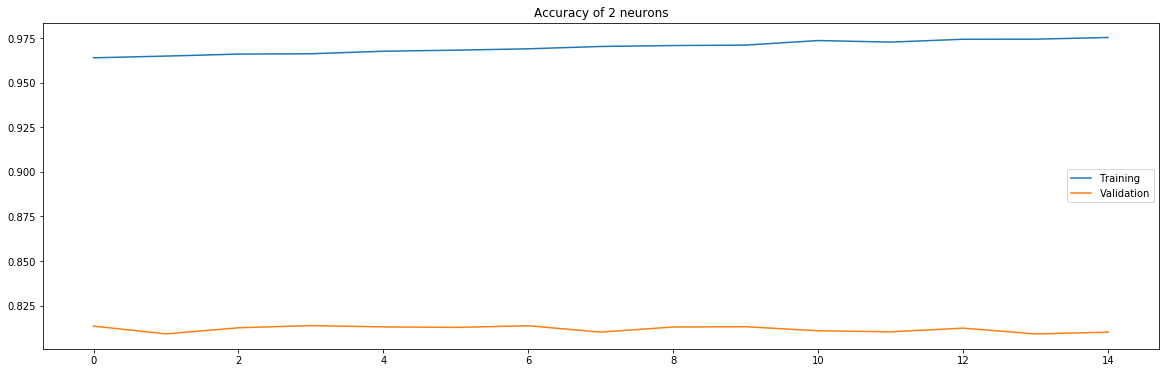

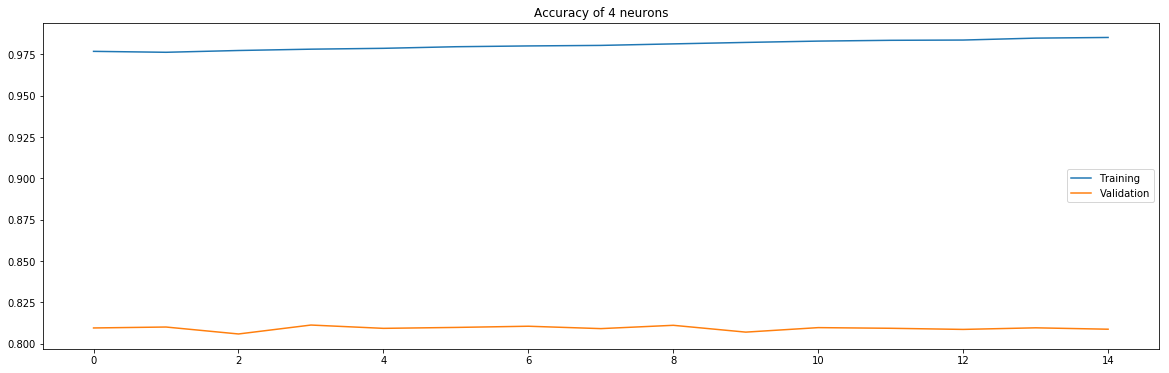

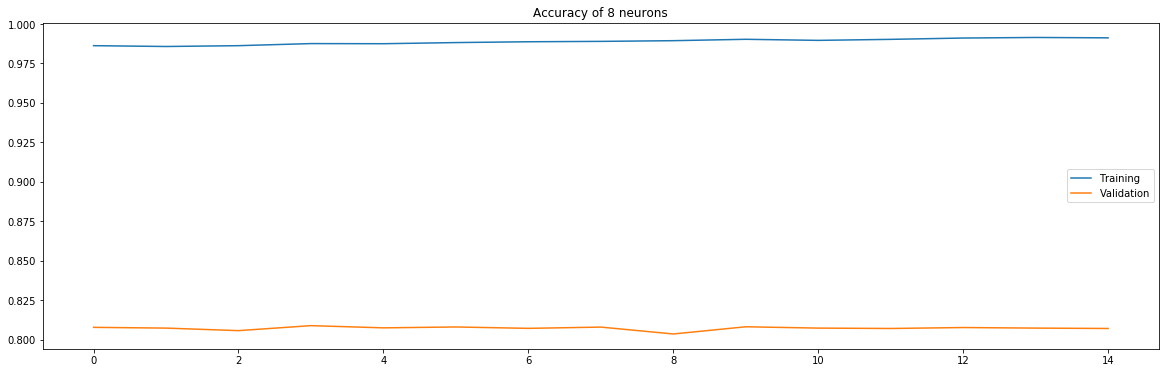

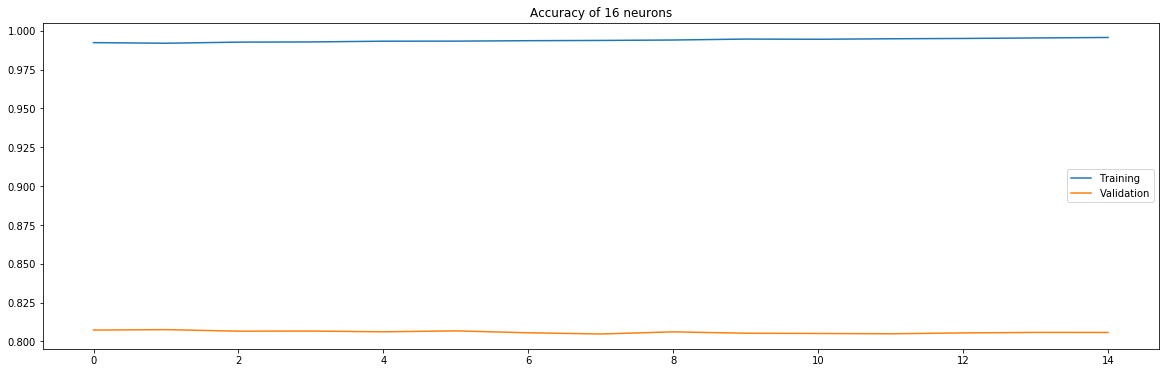

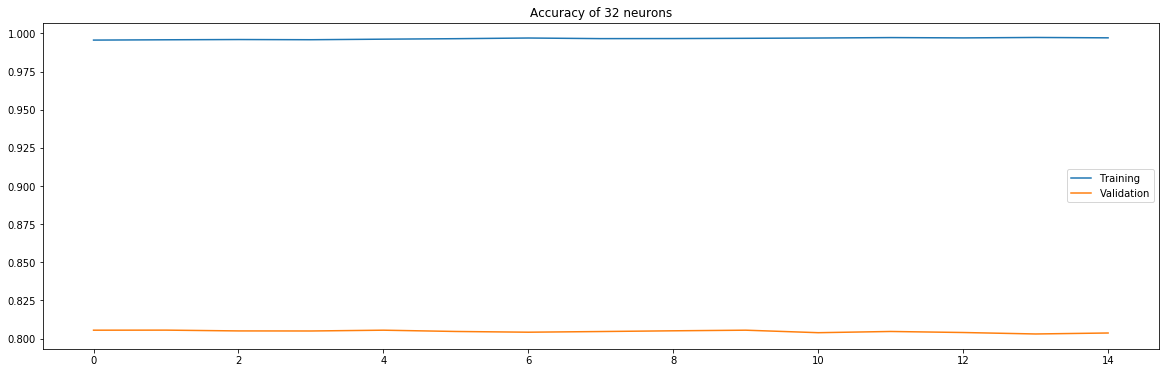

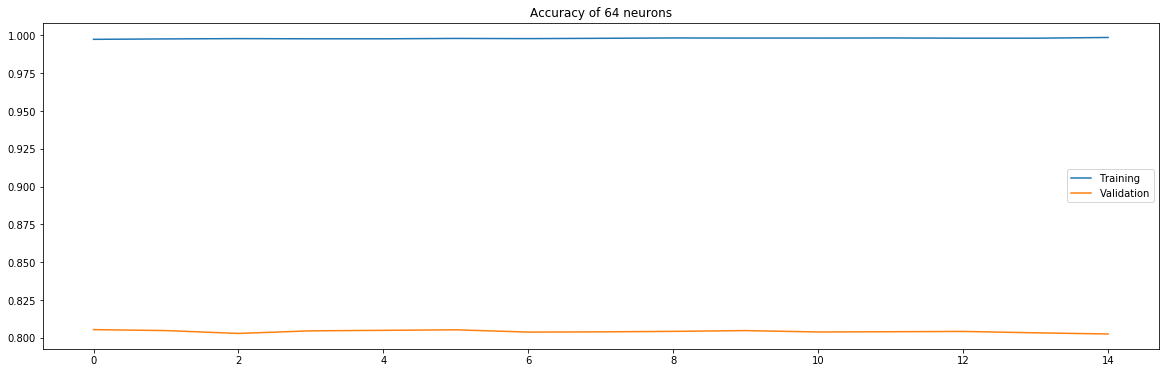

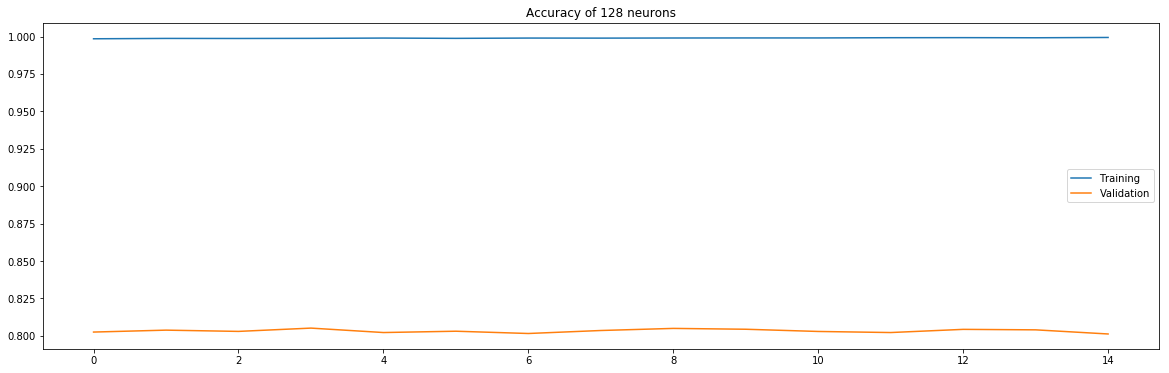

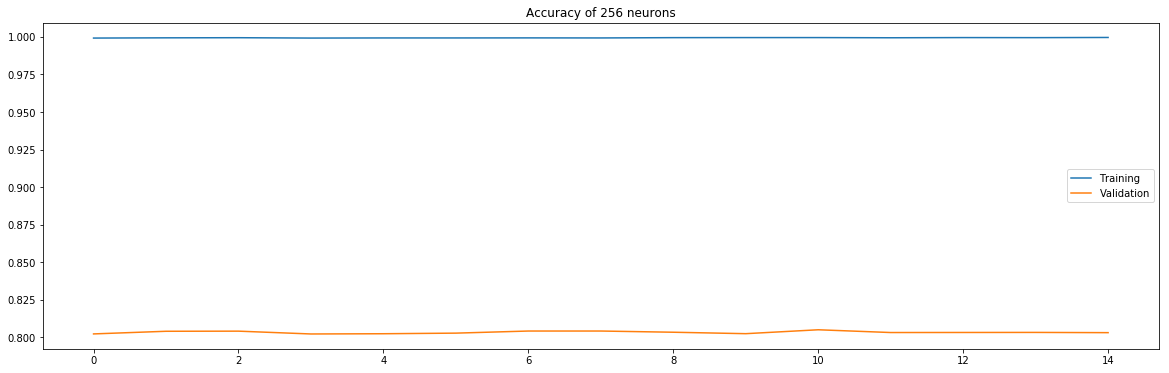

In [0]:
for elements, idx in zip(all_accuracy, [2, 4, 8, 16, 32, 64, 128, 256]):
  plt.figure(figsize=(20,6))
  plt.title("Accuracy of " + str(idx) + " neurons")
  plt.plot(range(0, 15), elements[0])
  plt.plot(range(0, 15), elements[1])
  plt.legend(["Training", "Validation"])
  print("Max value epoch validation: ", elements[1].index(max(elements[1])), max(elements[1]))

Podemos ver que a medida que aumentamos la cantidad de neuronas en la capa obtenemos overfitting. El accuracy de entrenamiento aumenta y la de validación va disminuyendo. 

## e) Pesos de la red

Luego de entrenar las redes anteriores, debemos analizar la estructura de los pesos anteriormente entrenados. Utilizaremos el modelo ganador y graficaremos sus pesos, para después compararlos con una red neuronal de su misma estructura pero sin entrenar.

Epoch 1/15
25000/25000 [==============================] - 1s 46us/step - loss: 0.7012 - acc: 0.5392
Epoch 2/15
25000/25000 [==============================] - 1s 42us/step - loss: 0.6564 - acc: 0.6085
Epoch 3/15
25000/25000 [==============================] - 1s 44us/step - loss: 0.6224 - acc: 0.6577
Epoch 4/15
25000/25000 [==============================] - 1s 44us/step - loss: 0.5948 - acc: 0.6926
Epoch 5/15
25000/25000 [==============================] - 1s 45us/step - loss: 0.5716 - acc: 0.7178
Epoch 6/15
25000/25000 [==============================] - 1s 43us/step - loss: 0.5517 - acc: 0.7357
Epoch 7/15
25000/25000 [==============================] - 1s 44us/step - loss: 0.5344 - acc: 0.7480
Epoch 8/15
25000/25000 [==============================] - 1s 44us/step - loss: 0.5191 - acc: 0.7594
Epoch 9/15
25000/25000 [==============================] - 1s 44us/step - loss: 0.5056 - acc: 0.7680
Epoch 10/15
25000/25000 [==============================] - 1s 44us/step - loss: 0.4936 - acc: 0.7763

<function matplotlib.pyplot.show>

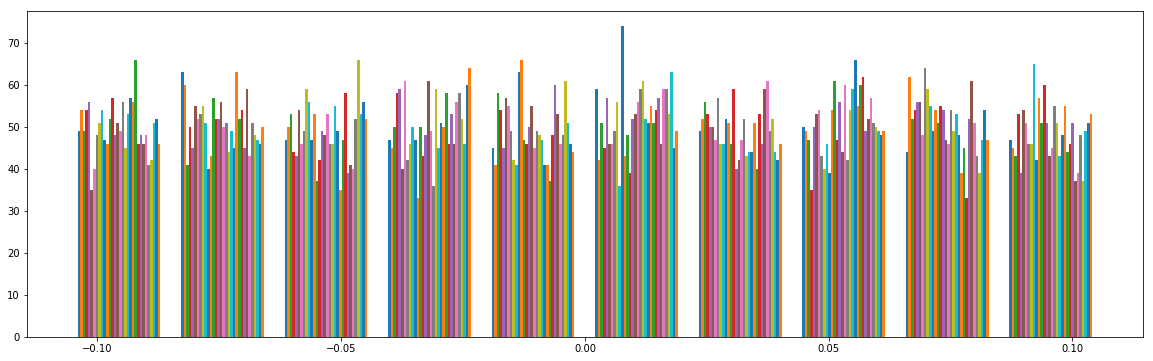

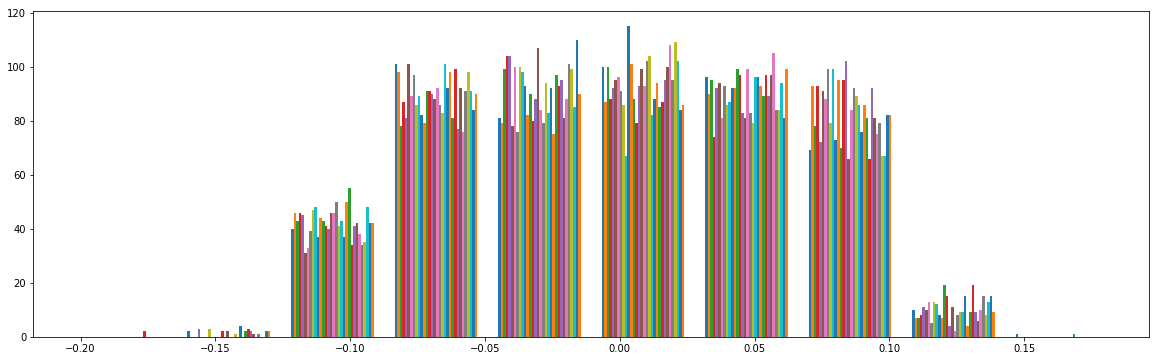

In [0]:
untrained = Sequential()
untrained.add(Dense(32, activation='tanh'))
untrained.add(Dense(1,activation='sigmoid'))
untrained.compile(SGD(lr=0.001),loss='binary_crossentropy',metrics=['accuracy'])
untrained.fit(x_tr,y_tr,epochs=0) 
plt.figure(figsize=(20,6))
plt.hist(untrained.get_weights()[0])
plt.show
untrained.fit(x_tr, y_tr, epochs = 15)
plt.figure(figsize=(20,6))
plt.hist(untrained.get_weights()[0])
plt.show

Podemos apreciar que cuando se inicializan los pesos, tenemos una distribución heterogénea entre ellas, donde los valores se reparten entre el espectro. En cambio cuando ya entrenamos la red neuronal, vemos que se mantienen centrado en 0.

Las razones pueden ser, por ejemplo, que al entrenar, ciertos pesos son los que darán mas importancia a ciertos atributos de la muestra. Otra razón es que como son secuencias de palabras y se esta buscando casi un análisis de sentimiento, hay ciertas palabras que son las que determinan si una review es positiva o negativa, por lo que las palabras que no son importantes hace que sus pesos sean asignados a 0, haciendo que cuando entren al modelo no interfieran. Eso explicaría la prueba de que tantos pesos esten evaluados en cero.

## i) AdaBoost

AdaBoost o Adaptative Boosting es un meta algoritmo que se encarga de realizar ensamblados de modelos. Ocuparemos este ensamblado para el entrenamiento de un árbol de clasificación, y tomaremos en cuenta su accuracy.

In [0]:
clf = AdaBoostClassifier(base_estimator = DecisionTreeClassifier(criterion='gini', max_depth=8), n_estimators=200, random_state=0)
clf.fit(x_tr, y_tr)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=8,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                             

In [0]:
print("Training score: ", clf.score(x_tr, y_tr))
print("Validation score: ", clf.score(x_val, y_val))

Training score:  1.0
Validation score:  0.73692


Podemos ver la presencia de un overfitting grotesco, donde afecta principalmente en el score del conjunto de validación. Aún así, la profundidad del árbol es bastante grande, por lo que también puede ser esta la razón y no la aplicación de AdaBoost en sí.